In [470]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [471]:
#Load the dataset
df = pd.read_csv('data.csv')
print(df.head())

   time time_code         country country_code         GDP  \
0  1960    YR1960     Afghanistan          AFG          ..   
1  1960    YR1960         Albania          ALB          ..   
2  1960    YR1960         Algeria          DZA  2723615451   
3  1960    YR1960  American Samoa          ASM          ..   
4  1960    YR1960         Andorra          AND          ..   

  education_expenditure_pencent education_government_expenditure_percent_GDP  \
0                            ..                                           ..   
1                            ..                                           ..   
2                            ..                                           ..   
3                            ..                                           ..   
4                            ..                                           ..   

  education_school_enrollment_preprimary_percent  \
0                                             ..   
1                                         

Upon visually inspecting the head of the data, there are some non-numeric columns and empty values are using .. as place holder
For this analysis, I will ignore the non-numeric columns and replace .. with NaN for ease of hanlding

In [472]:
#Drop non-numeric or identifier columns
df = df.drop(['time','time_code','country','country_code'],axis=1)
df = df.replace("..", np.nan)
df = df.apply(pd.to_numeric, errors='coerce')
df.describe()

,GDP,education_expenditure_pencent,education_government_expenditure_percent_GDP,education_school_enrollment_preprimary_percent,education_school_enrollment_pprimary_percent,education_school_enrollment_secondary_percent,education_school_enrollment_tertiary_percent,health_expenditure_percent_GDP,health_hospital_beds_perThousandPeople,health_nurses_midwives_perThousandPeople,...,labor_advanced_education_percent,labor_basic_education_percent,labor_intermediate_education_percent,labor_force_total,labor_unemployment_percent_ILO,labor_unemployment_percent_national,trade_tourism_arrival,trade_tourism_receipts,trade_tariffs_applied_simple_mean,trade_tariffs_applied_weighted_mean
count,1.166900e+04,1817.000000,5161.000000,6216.000000,6991.000000,5882.000000,5020.000000,4405.000000,4762.000000,3129.000000,...,2425.000000,2434.000000,2431.000000,6.606000e+03,6417.000000,5019.000000,4.721000e+03,4.202000e+03,3806.000000,3806.000000
mean,2.331989e+11,90.723005,4.310837,50.484781,96.692289,66.723813,28.565140,6.264384,4.212463,5.057011,...,78.468705,48.210552,65.585330,1.712349e+07,8.111559,7.991241,1.180550e+07,6.437533e+09,8.765741,7.160720
std,1.299324e+12,7.788342,2.184559,35.096105,22.601540,35.461454,28.277211,2.874505,3.412736,4.131739,...,7.427915,16.034908,9.565821,6.638627e+07,6.078154,6.071373,5.671510e+07,2.695707e+10,7.017827,10.095417
min,2.585956e+06,32.809990,0.000000,0.000000,6.887230,0.000000,0.000000,1.107200,0.100000,0.048000,...,30.952000,12.621000,23.108000,1.681200e+04,0.100000,0.039000,7.000000e+02,1.000000e+05,0.000000,0.000000
25%,1.455483e+09,88.453552,2.979440,17.809620,91.906219,35.820562,4.415382,4.173656,1.630000,1.576000,...,75.103000,36.864250,61.051000,9.055898e+05,3.650000,3.900000,3.280000e+05,1.572500e+08,3.260000,2.240000
50%,8.041999e+09,92.291992,4.155320,49.260380,100.760231,73.270649,18.165065,5.648491,3.240000,4.351000,...,79.440000,48.158000,66.229000,3.095891e+06,6.343000,6.490000,1.289000e+06,7.630000e+08,7.560000,5.195000
75%,5.276162e+10,95.415367,5.327578,80.323307,107.874802,95.656139,48.393507,8.011285,5.930000,7.244000,...,83.094000,59.419250,71.528500,9.210298e+06,11.049000,10.313000,5.161000e+06,3.743000e+09,12.360000,10.040000
max,2.920000e+13,100.000000,66.900307,245.847183,214.642624,164.079819,166.665649,24.230690,40.315456,27.060000,...,100.000000,100.000000,100.000000,7.811879e+08,38.800000,57.000000,9.688734e+08,4.320000e+11,105.360000,421.500000


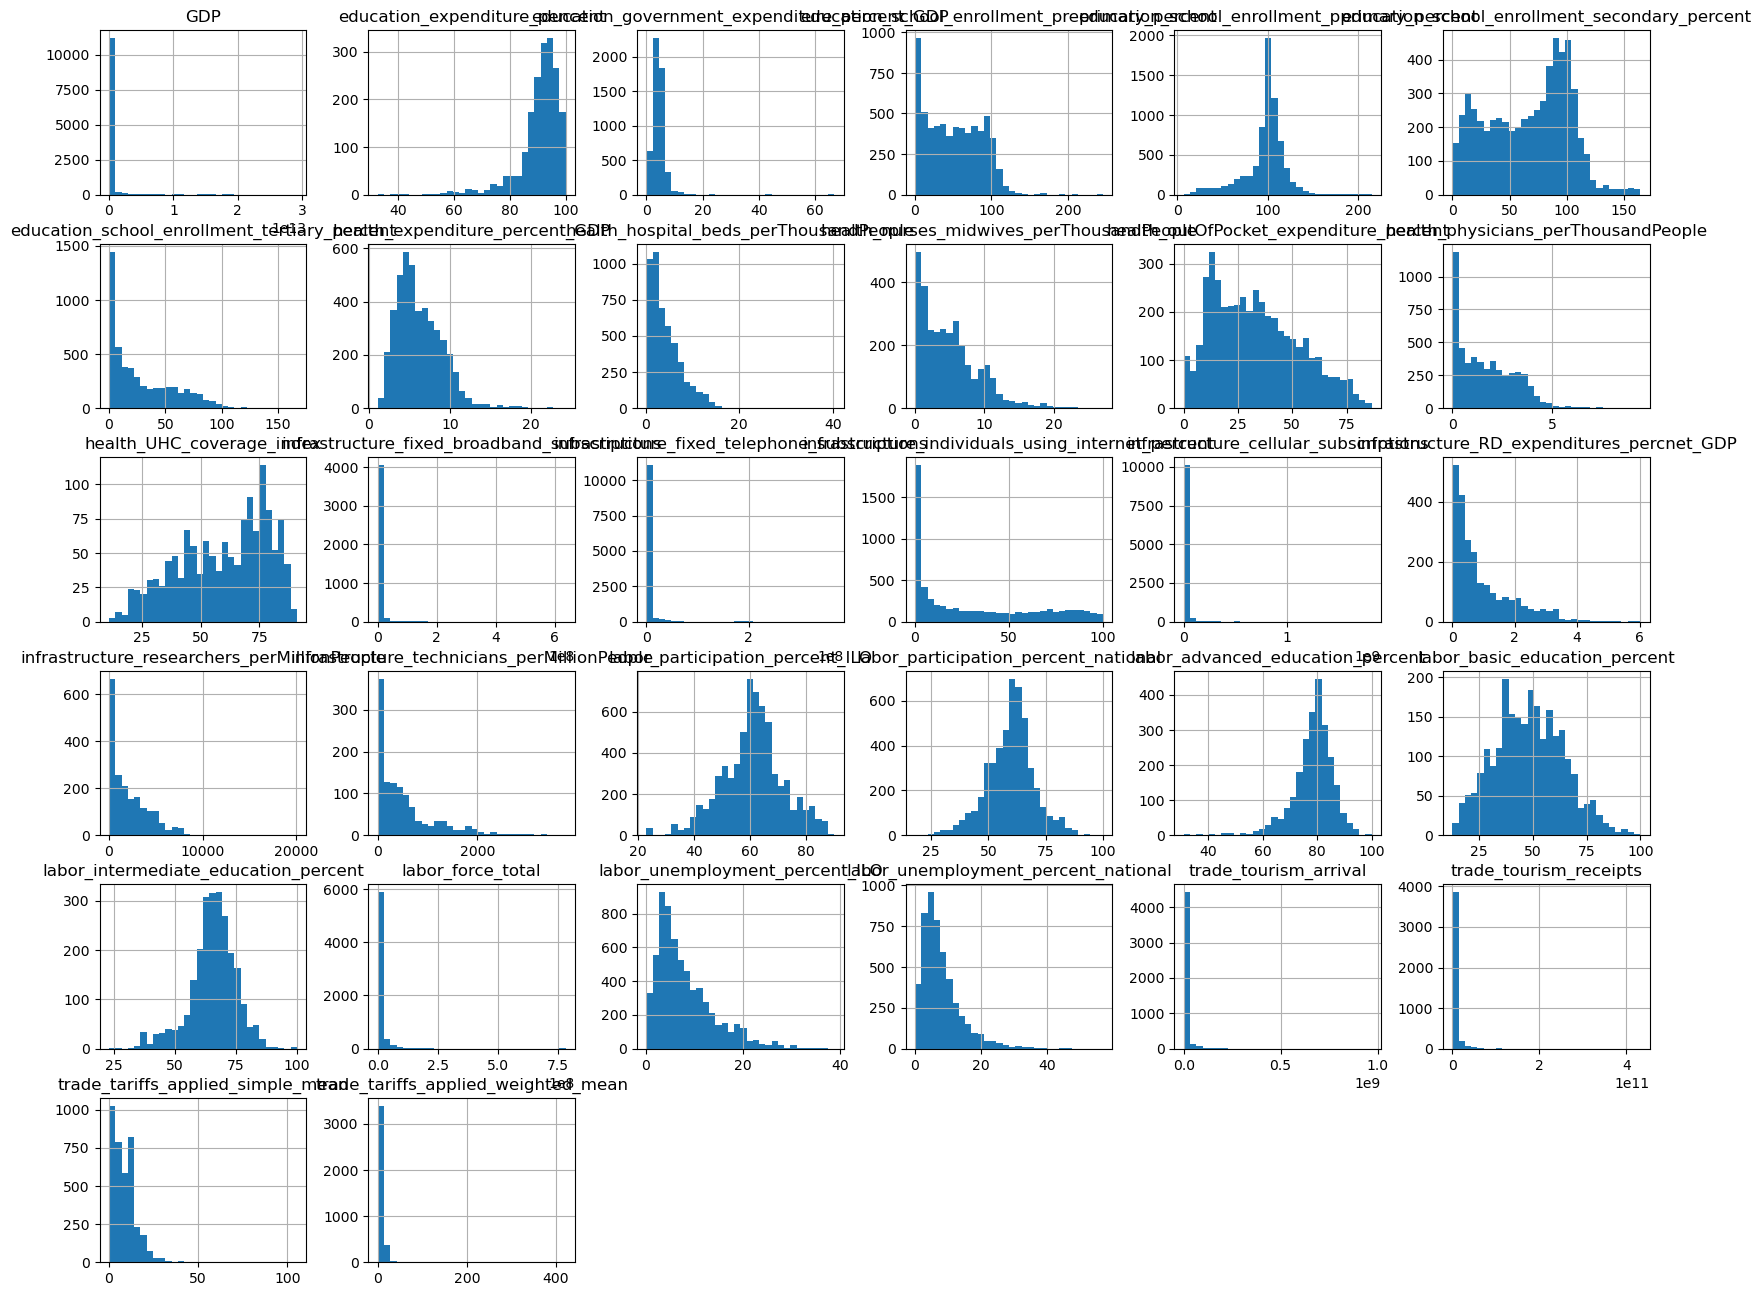

In [473]:
#Create a histogram to visually inspect the distribution of each feature
df.hist(bins=30, figsize=(20,16))
plt.show()

We can see most of the features follow a normal distribution

In [474]:
#Using a correlation matrix to identify features that are strongly correlated with GDP
corr_matrix = df.corr()
corr_matrix['GDP'].sort_values(ascending = False)

GDP                                                  1.000000
trade_tourism_receipts                               0.882921
infrastructure_fixed_telephone_subscriptions         0.789849
infrastructure_fixed_broadband_subscriptions         0.733544
trade_tourism_arrival                                0.704089
infrastructure_cellular_subscriptions                0.621898
labor_force_total                                    0.502147
infrastructure_RD_expenditures_percnet_GDP           0.377311
health_expenditure_percent_GDP                       0.274307
education_school_enrollment_tertiary_percent         0.251595
infrastructure_technicians_perMillionPeople          0.231855
health_UHC_coverage_index                            0.225019
health_nurses_midwives_perThousandPeople             0.201272
infrastructure_researchers_perMillionPeople          0.194125
infrastructure_individuals_using_internet_percent    0.193854
education_school_enrollment_secondary_percent        0.181203
educatio

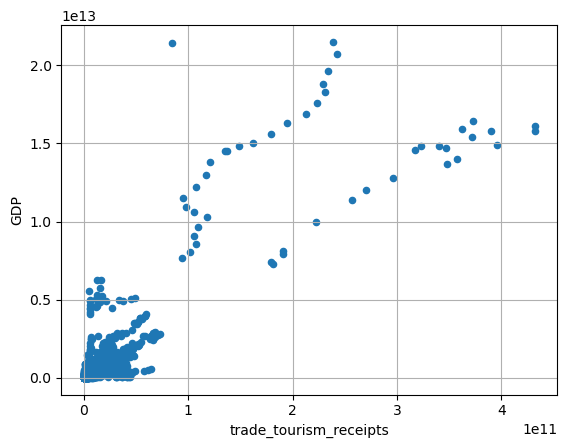

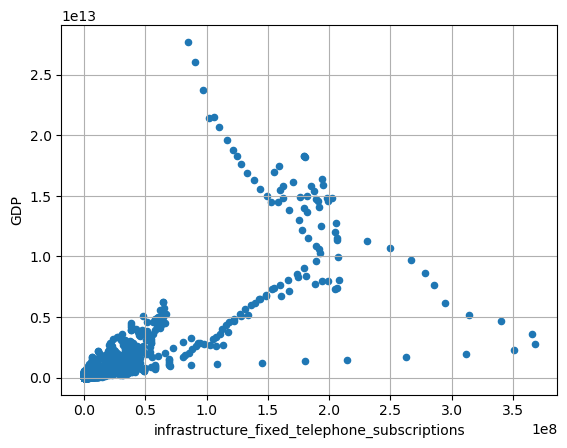

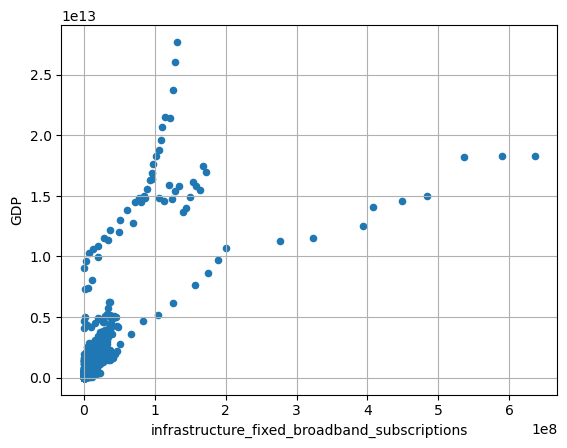

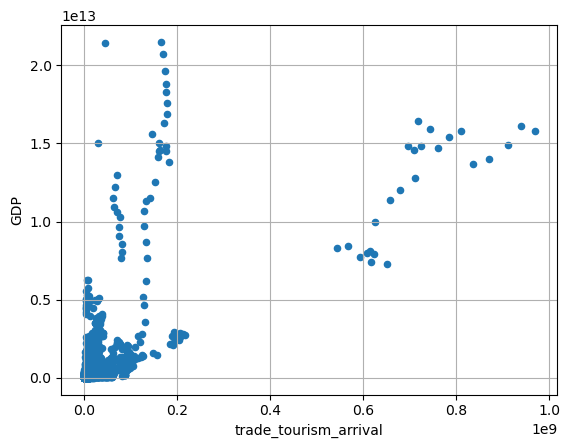

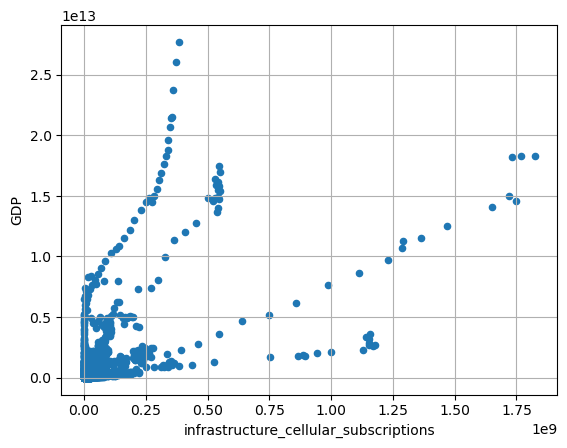

In [475]:
#Based on the correlation matrix, trade_tourism_receipts, infrastructure_cellular_subscriptions, infrastructure_fixed_broadband_subscriptions, trade_tourism_arrival and infrastructure_cellular_subscriptions appears to be strongly correlated with GDP
#Create a scatter plot to visualize the relationship
# df = df[['trade_tourism_receipts','infrastructure_fixed_telephone_subscriptions', 'infrastructure_fixed_broadband_subscriptions','trade_tourism_arrival','infrastructure_cellular_subscriptions' ,'GDP']]

df.plot(kind="scatter", x="trade_tourism_receipts", y="GDP", grid=True)
df.plot(kind="scatter", x="infrastructure_fixed_telephone_subscriptions", y="GDP", grid=True)
df.plot(kind="scatter", x="infrastructure_fixed_broadband_subscriptions", y="GDP", grid=True)
df.plot(kind="scatter", x="trade_tourism_arrival", y="GDP", grid=True)
df.plot(kind="scatter", x="infrastructure_cellular_subscriptions", y="GDP", grid=True)
plt.show()


Upon visually inspect these plots, while they do show a generally positive correlation, some of them show some level of clustering

Would this be caused by the fundamentally different economic structure for developped vs. underdeveloped contries?

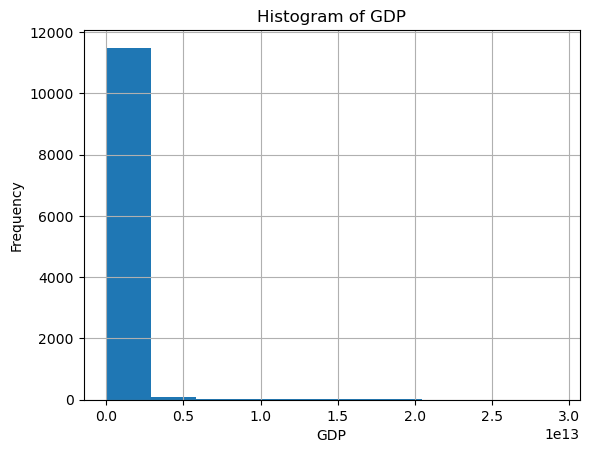

In [476]:
df['GDP'].hist()
plt.xlabel("GDP")
plt.ylabel("Frequency")
plt.title("Histogram of GDP")
plt.show()

As can see from the distribution of GDP, only minimal data falls in the top tier GDP range

The are generally GDP data from the world's largest economies, their economic structure can be very different than the others

For the analysis below, we're going to remove the top 5 percentile GDP to reduce the impact of outliers

In [477]:
#To reduce the impact of outliers, we will only keep data points with GDP below the 95th percentile

threshold_95 = df['GDP'].quantile(0.95)
df = df[df['GDP'] <= threshold_95]

corr_matrix = df.corr()
corr_matrix['GDP'].sort_values(ascending = False)


GDP                                                  1.000000
infrastructure_fixed_telephone_subscriptions         0.717627
infrastructure_fixed_broadband_subscriptions         0.652467
trade_tourism_receipts                               0.623270
education_school_enrollment_tertiary_percent         0.510532
trade_tourism_arrival                                0.500919
infrastructure_RD_expenditures_percnet_GDP           0.475928
infrastructure_cellular_subscriptions                0.471520
health_UHC_coverage_index                            0.408129
education_school_enrollment_secondary_percent        0.395782
infrastructure_researchers_perMillionPeople          0.379371
health_physicians_perThousandPeople                  0.346871
labor_force_total                                    0.328032
infrastructure_individuals_using_internet_percent    0.324390
health_nurses_midwives_perThousandPeople             0.316945
education_school_enrollment_preprimary_percent       0.303216
infrastr

The correlation between GDP and Tertiary school enrollment significantly and the correlation between GDP and Labor Force total has decreased

Telephone, Broadband, and Cellular subscriptions, Tourism and R&D expenditures stay consistenly highly correlated

With this in mind, what does that mean for policy makers to take a targetd approach, vs a target approach, for example on Commnications infrastructure (telephone, broadband and cellular)?

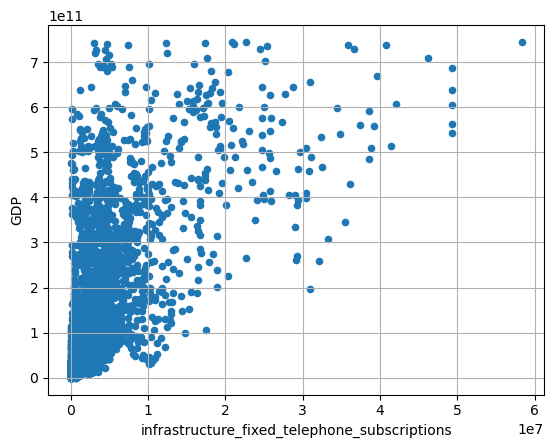

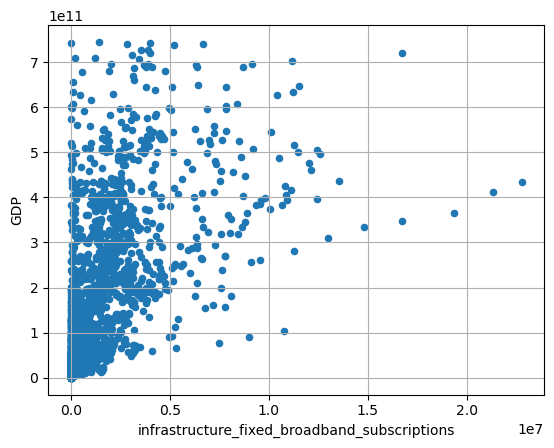

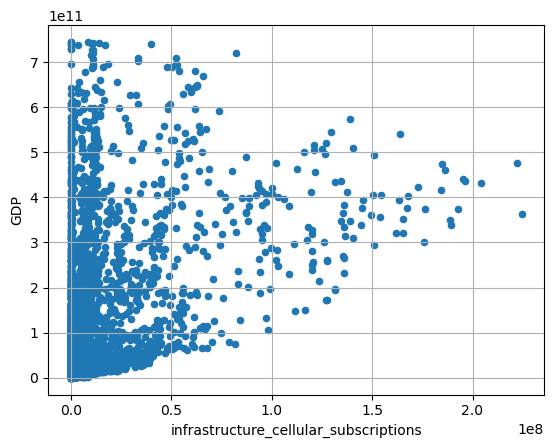

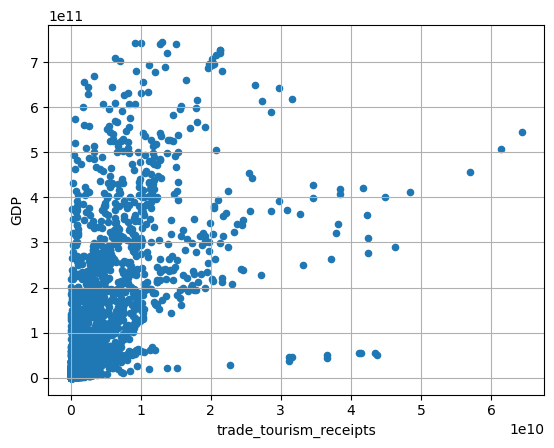

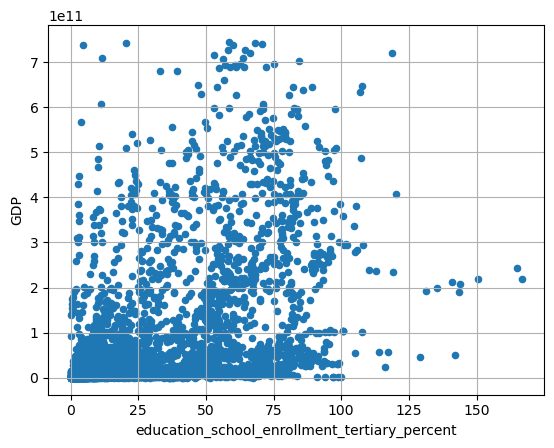

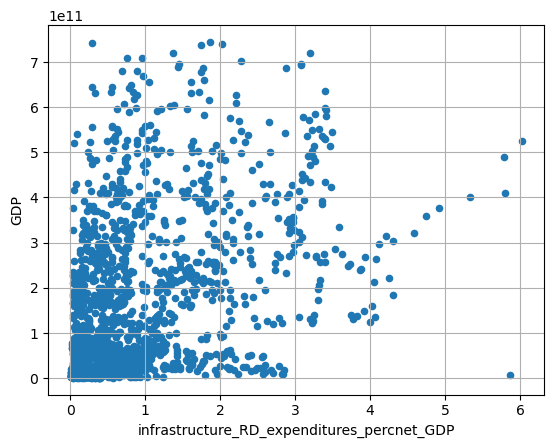

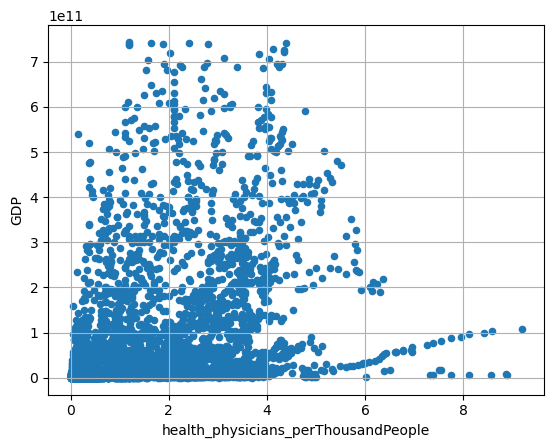

In [478]:
#Pick top 5 featuers in different domains that are strongly correlated with GDP

df.plot(kind="scatter", x="infrastructure_fixed_telephone_subscriptions", y="GDP", grid=True)
df.plot(kind="scatter", x="infrastructure_fixed_broadband_subscriptions", y="GDP", grid=True)
df.plot(kind="scatter", x="infrastructure_cellular_subscriptions", y="GDP", grid=True)
df.plot(kind="scatter", x="trade_tourism_receipts", y="GDP", grid=True)
df.plot(kind="scatter", x="education_school_enrollment_tertiary_percent", y="GDP", grid=True)
df.plot(kind="scatter", x="infrastructure_RD_expenditures_percnet_GDP", y="GDP", grid=True)
df.plot(kind="scatter", x="health_physicians_perThousandPeople", y="GDP", grid=True)
plt.show()

What can we see from this subset of data?

After leaving out the outliers, clustering is no longer showing, however the correlation is not extremely strong

In [479]:
#Train a linear regression model using balanced features as the predictors for GDP
from sklearn.linear_model import LinearRegression
df_balance = df[['infrastructure_fixed_telephone_subscriptions', 'trade_tourism_receipts','education_school_enrollment_tertiary_percent','infrastructure_RD_expenditures_percnet_GDP' ,
'health_physicians_perThousandPeople','GDP']]
df_balance = df_balance.dropna()
X_balance = df_balance.drop("GDP", axis=1)
y_balance = df_balance['GDP']
X_balance_train, X_balance_test, y_balance_train, y_balance_test = train_test_split(X_balance, y_balance, test_size=0.2, random_state=0)

linear_model = LinearRegression()
linear_model.fit(X_balance_train, y_balance_train)

LinearRegression()

In [480]:
#Evaluate the model's performance
linear_balance_train_pred = linear_model.predict(X_balance_train)
linear_balance_test_pred = linear_model.predict(X_balance_test)

from sklearn.metrics import root_mean_squared_error, r2_score
linear_balance_rmse_train = root_mean_squared_error(y_balance_train, linear_balance_train_pred)
print(linear_balance_rmse_train)
linear_rmse_test = root_mean_squared_error(y_balance_test, linear_balance_test_pred)
print(linear_rmse_test)

linear_r2 = r2_score(y_balance_test, linear_balance_test_pred)
print(linear_r2)


100426941520.81012
79602939328.56036
0.6738030395202433


In [481]:
#Repeat the process using only communication infrastructure related features as the predictors for GDP
df_target = df[['infrastructure_fixed_telephone_subscriptions', 'infrastructure_fixed_broadband_subscriptions','infrastructure_cellular_subscriptions','GDP']]
df_target = df_target.dropna()
X_target = df_target.drop("GDP", axis=1)
y_target = df_target['GDP']
X_target_train, X_target_test, y_target_train, y_target_test = train_test_split(X_target, y_target, test_size=0.2, random_state=0)

linear_model = LinearRegression()
linear_model.fit(X_target_train, y_target_train)

linear_target_train_pred = linear_model.predict(X_target_train)
linear_target_test_pred = linear_model.predict(X_target_test)

from sklearn.metrics import root_mean_squared_error, r2_score
linear_target_rmse_train = root_mean_squared_error(y_target_train, linear_target_train_pred)
print(linear_target_rmse_train)
linear_rmse_test = root_mean_squared_error(y_target_test, linear_target_test_pred)
print(linear_rmse_test)

linear_r2 = r2_score(y_target_test, linear_target_test_pred)
print(linear_r2)

94295874064.6235
97685327388.87706
0.5750940863600791


In [483]:
#Repeat the process using only tourism related features as the predictors for GDP
df_target = df[['trade_tourism_receipts','trade_tourism_arrival','GDP']]
df_target = df_target.dropna()
X_target = df_target.drop("GDP", axis=1)
y_target = df_target['GDP']
X_target_train, X_target_test, y_target_train, y_target_test = train_test_split(X_target, y_target, test_size=0.2, random_state=0)

linear_model = LinearRegression()
linear_model.fit(X_target_train, y_target_train)

linear_target_train_pred = linear_model.predict(X_target_train)
linear_target_test_pred = linear_model.predict(X_target_test)

from sklearn.metrics import root_mean_squared_error, r2_score
linear_target_rmse_train = root_mean_squared_error(y_target_train, linear_target_train_pred)
print(linear_target_rmse_train)
linear_rmse_test = root_mean_squared_error(y_target_test, linear_target_test_pred)
print(linear_rmse_test)

linear_r2 = r2_score(y_target_test, linear_target_test_pred)
print(linear_r2)

106366629444.07108
98695548162.20279
0.3804526398507575


In [482]:
#Repeat the process using only communication infrastructure and tourism related features as the predictors for GDP
df_target = df[['infrastructure_fixed_telephone_subscriptions', 'infrastructure_fixed_broadband_subscriptions','infrastructure_cellular_subscriptions','trade_tourism_receipts','trade_tourism_arrival','GDP']]
df_target = df_target.dropna()
X_target = df_target.drop("GDP", axis=1)
y_target = df_target['GDP']
X_target_train, X_target_test, y_target_train, y_target_test = train_test_split(X_target, y_target, test_size=0.2, random_state=0)

linear_model = LinearRegression()
linear_model.fit(X_target_train, y_target_train)

linear_target_train_pred = linear_model.predict(X_target_train)
linear_target_test_pred = linear_model.predict(X_target_test)

from sklearn.metrics import root_mean_squared_error, r2_score
linear_target_rmse_train = root_mean_squared_error(y_target_train, linear_target_train_pred)
print(linear_target_rmse_train)
linear_rmse_test = root_mean_squared_error(y_target_test, linear_target_test_pred)
print(linear_rmse_test)

linear_r2 = r2_score(y_target_test, linear_target_test_pred)
print(linear_r2)

79475258811.95705
90341719559.06381
0.6447489713349505


As you can see the target model focused only on Communications and Tourism performs worse

Also the RSME score is larger on the test set, which indicates slight overfitting